# Training Session

In [1]:
import pickle

from build_vocab import *
from build_answers import *


In [2]:
# train2014
answers_path = '/home/ubuntu/dotCuda/notebook/answers.pkl'
with open(answers_path, 'rb') as f:
    answers = pickle.load(f)

vocab_path = '../../dotCuda/notebook/vocab.pkl'
with open(vocab_path, 'rb') as f:
    vocab = pickle.load(f)
    
# val2014
answers_path = '/home/ubuntu/dotCuda/notebook/valanswers.pkl'
with open(answers_path, 'rb') as f:
    valanswers = pickle.load(f)

vocab_path = '../../dotCuda/notebook/valvocab.pkl'
with open(vocab_path, 'rb') as f:
    valvocab = pickle.load(f)

In [3]:
from dataset import *

train_dataset = COCODataset(vocab=vocab, answers=answers)
val_dataset = COCODataset(vocab=valvocab, answers=valanswers)

loading VQA annotations and questions into memory...
0:00:07.421230
creating index...
index created!
loading VQA annotations and questions into memory...
0:00:08.244280
creating index...
index created!


### Network Model

In [4]:
# import network 
from network_v5b import *

In [5]:
import torch
device = torch.device('cuda')

vocab_size = len(vocab)
model = ConcatNet(vocab_size).to(device)


### Trainer Class

In [6]:
# import trainer
from trainer import VQATrainer

trainer = VQATrainer(model, device)

### Train!

In [7]:
trained_model, statistics = trainer.train(train_dataset, val_dataset, save_every=50, learnrate=10, collate_fn=collate, e_break=1, epoch=100)

Epoch 0 of 100
  Training...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 64.05093 and accuracy 0.000 in 0.6988s
  Validating...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f9b65240e80>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 64.05094 and accuracy 0.000 in 0.5835s
Epoch 3 of 100
  Training...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, de

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f9b652c1ac8>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 1,  1,  1,  1,  1,  0,  1,  1,  1,  1], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 64.05092 and accuracy 0.000 in 0.5352s
Epoch 8 of 100
  Training...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, de

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f9b652c1ac8>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 1,  1,  1,  1,  1,  0,  1,  1,  1,  1], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 64.05091 and accuracy 0.000 in 0.5621s
Epoch 9 of 100
  Training...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, de

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 64.05089 and accuracy 0.000 in 0.6791s
Epoch 14 of 100
  Training...


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f9b652c6080>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 64.05071 and accuracy 0.000 in 0.5692s
  Validating...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0'

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f9b652c6240>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 64.05085 and accuracy 0.000 in 0.5912s
Epoch 18 of 100
  Training...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 1,  1,  1,  1,  1,  0,  1,  1,  1,  1], dtype=torch.uint8, d

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 64.05081 and accuracy 0.000 in 0.7274s
Epoch 23 of 100
  Training...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, d

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 64.05076 and accuracy 0.000 in 0.6584s
Epoch 28 of 100
  Training...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, d

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f9b652c1710>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 64.05025 and accuracy 0.000 in 0.5802s
  Validating...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0'

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f9b652c1ac8>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 64.05022 and accuracy 0.000 in 0.6051s
  Validating...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0'

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f9b652c6a58>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 64.05000 and accuracy 0.000 in 0.6125s
  Validating...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0'

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f9b652c1c18>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 58, in detach
    return reduction.recv_handle(conn)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 64.05057 and accuracy 0.000 in 0.5560s
Epoch 39 of 100
  Training...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, d

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f9b652c6ef0>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 64.05047 and accuracy 0.000 in 0.5496s
Epoch 42 of 100
  Training...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, d

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 64.05019 and accuracy 0.000 in 0.6891s
Epoch 47 of 100
  Training...


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f9b65240828>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 64.04848 and accuracy 0.000 in 0.5771s
  Validating...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0'

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f9b652c6a20>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 64.04710 and accuracy 0.000 in 0.5668s
  Validating...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0'

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f9b65240048>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 64.04918 and accuracy 0.000 in 0.5591s
Epoch 52 of 100
  Training...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, d

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f9b652c1160>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 63.84070 and accuracy 0.000 in 0.6161s
  Validating...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0'

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 63.05553 and accuracy 0.000 in 0.7672s
  Validating...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0'

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 63.05553 and accuracy 0.000 in 0.7049s
  Validating...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0'

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 63.05553 and accuracy 0.000 in 0.7366s
  Validating...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0'

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 63.05553 and accuracy 0.000 in 0.7293s
  Validating...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0'

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 63.05553 and accuracy 0.000 in 0.7353s
  Validating...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0'

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f9b652c1400>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 64.05553 and accuracy 0.000 in 0.5496s
Epoch 85 of 100
  Training...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, d

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f9b65247160>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 64.05553 and accuracy 0.000 in 0.5451s
Epoch 88 of 100
  Training...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, d

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f9b652c1400>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 64.05553 and accuracy 0.000 in 0.5406s
Epoch 89 of 100
  Training...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, d

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f9b65240fd0>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 63.05553 and accuracy 0.000 in 0.5741s
  Validating...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0'

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f9b65249208>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 64.05553 and accuracy 0.000 in 0.5769s
Epoch 94 of 100
  Training...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, d

correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
   >> Epoch finished with loss 64.05553 and accuracy 0.000 in 0.6824s
Epoch 99 of 100
  Training...
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, d

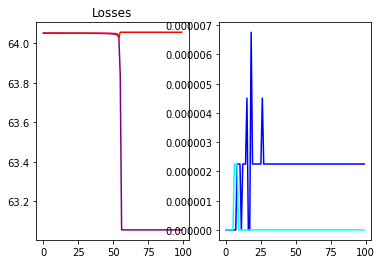

In [8]:
# import pickle

# with open('stats.st', 'rb') as statfile:
#     statistic = pickle.load(statfile)
    
# #print(statistic)

# #trainer.plot_over_epoch()
# from trainer import VQATrainer

# trainer = VQATrainer(None, None)
# trainer.statistics = statistic

trainer.plot_over_epoch()

In [ ]:
from torchvision import transforms
import matplotlib.pyplot as plt
import random


device = torch.device('cuda')
vocab_size = len(vocab)
model = ConcatNet(vocab_size).to(device)

state_dict = torch.load('model_epoch2.pt')
model.load_state_dict(state_dict)
    

In [ ]:
def get_loss(outputs, labels):
    criterion = torch.nn.CrossEntropyLoss()
     # handling loss
    total_loss = None
    for i, label in enumerate(labels): # loop by batch
        one_data_loss = None
        print(label)
        print(outputs[i:i+1])
        if list(label.size())[0] < 3:
            continue
        for j in range(list(label.size())[0]):
            if one_data_loss is None:
                one_data_loss = criterion(outputs[i:i+1].float(), label[j:j+1].long())
            else:
                one_data_loss += criterion(outputs[i:i+1].float(), label[j:j+1].long())
        one_data_loss = one_data_loss / list(label.size())[0]
        # assigning to total loss
        if total_loss is None:
            total_loss = one_data_loss
        else:
            total_loss += one_data_loss

    return total_loss

In [ ]:
def approve_by_3tuple(outputs, label):
    # approved_by_three but takes tuple of tensor as label
    _, pred = outputs.topk(1)
    corrects = 0
    for i in range(len(label)):
        pred_answer = pred[i]
        label_answer = label[i]
        if list(label_answer.size())[0] < 3:
            continue
        #print(pred_answer, label_answer)
        correct_tensor = (pred_answer.long() == label_answer.long())
        print('correct:', correct_tensor)
        corrects += min(3, correct_tensor.sum().item())
    return corrects / (3 * len(label))

In [11]:
import random

for idx in range(8):#[random.randint(0, 8) for i in range(8)]:
    print('\nqn no', idx)
    qns, img, ans = collate([train_dataset[idx]])
    output = model(img.cuda(), qns.long().cuda())
    _, pred = output.topk(1)
    # print(qns, pred)

    #pil_img = transforms.ToPILImage()(img)
    #plt.imshow(pil_img)
    qnss = ' '.join([vocab.idx2word[i.item()] for i in qns.data])
    ans_ = ' / '.join([answers.idx2ans[j.item()] for j in pred[0]])
    lbl = ' / '.join([answers.idx2ans[k.item()] for k in ans[0]])
    print('question:', qnss)
    print('answer:', ans_)
    print('label:', lbl)
    ans = [a.cuda() for a in ans]
    print('accuracy', trainer.accuracy_fn(output.detach(), ans))
    print('loss', trainer.get_losses(output, ans))


qn no 0
question: <start> what is this photo taken looking through ? <end>
answer: orange
label: net / net / net / net / net / mesh / net / net / net
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
accuracy 0.0
loss tensor(8.0069, device='cuda:0')

qn no 1
question: <start> what position is this man playing ? <end>
answer: orange
label: pitcher / catcher / pitcher / pitcher / pitcher / pitcher / pitcher / pitcher / pitcher / pitcher
correct: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0')
accuracy 0.0
loss tensor(8.0069, device='cuda:0')

qn no 2
question: <start> what color is the players shirt ? <end>
answer: orange
label: orange / orange / orange / orange / orange / orange / orange / orange / orange / orange
correct: tensor([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=torch.uint8, device='cuda:0')
accuracy 1.0
loss tensor(7.0069, device='cuda:0')

qn no 3
question: <start> is this man a professional b